In [641]:
import random
import matplotlib.pyplot as plt

In [237]:
class Connect4:
    def __init__(self):
        self.player, self.opponent = 'o', 'x'
        
    def printboard(self, board):
        rows = len(board)
        cols = len(board[0])
        board = [[' ' if x == '_' else x for x in row] for row in board]
        for row in range(len(board)):
            print('|', end=' ')
            for col in range(len(board[row])):
                print('{} |'.format(board[row][col]), end=' ')
            print()
        print()

    
    def isMovesLeft(self, board):
        rows = len(board)
        cols = len(board[0])
        for i in range(rows):
            for j in range(cols):
                if board[i][j] == '_':
                    return True
        return False
    
    def check_winner(self, board):
        rows = len(board)
        cols = len(board[0])
        
        for i in range(rows):
            for j in range(cols - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i][j+1] == board[i][j+2] == board[i][j+3]):
                    return board[i][j]

        for j in range(cols):
            for i in range(rows - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i+1][j] == board[i+2][j] == board[i+3][j]):
                    return board[i][j]

        for i in range(rows - 3):
            for j in range(cols - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i+1][j+1] == board[i+2][j+2] == board[i+3][j+3]):
                    return board[i][j]

        for i in range(3, rows):
            for j in range(cols - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i-1][j+1] == board[i-2][j+2] == board[i-3][j+3]):
                    return board[i][j]
                
        return None
    
    
    def evaluate(self, board):
        
#         self.opponent = 'o' if self.player == 'x' else 'x'
        rows = len(board)
        cols = len(board[0])
        
        for i in range(rows):
            for j in range(cols - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i][j+1] == board[i][j+2] == board[i][j+3]):
                    if board[i][j]==self.player:
                        return 10
                    elif board[i][j]==self.opponent :
                        return -10

        for j in range(cols):
            for i in range(rows - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i+1][j] == board[i+2][j] == board[i+3][j]):
                    if board[i][j]==self.player:
                        return 10
                    elif board[i][j]==self.opponent :
                        return -10

        for i in range(rows - 3):
            for j in range(cols - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i+1][j+1] == board[i+2][j+2] == board[i+3][j+3]):
                    if board[i][j]==self.player:
                        return 10
                    elif board[i][j]==self.opponent :
                        return -10
        
        for i in range(3, rows):
            for j in range(cols - 3):
                if (board[i][j] != '_' and
                    board[i][j] == board[i-1][j+1] == board[i-2][j+2] == board[i-3][j+3]):
                    if board[i][j]==self.player:
                        return 10
                    elif board[i][j]==self.opponent :
                        return -10
                
        return 0
    
    def getValidRow(self, board, column):
        row = 6
        while row >= 0:
            if board[row][column] == '_':
                break
            row -= 1
        if row < 0:
            return -1
        return row

    def minimax(self, board, depth, alpha, beta, isMax, isPrun):
        rows = len(board)
        cols = len(board[0])
        score = self.evaluate(board)

        if score == 10:
            return score

        if score == -10:
            return score

        if self.isMovesLeft(board) == False:
            return 0

        if depth == 0:
            return 0

        if isMax:
            best = -1000
            for j in range(cols):
                i = self.getValidRow(board, j)
                if i != -1:
                    board[i][j] = self.player
                    best = max(best, self.minimax(board, depth - 1, alpha, beta, not isMax, isPrun))
                    board[i][j] = '_'
                    if not isPrun:
                        alpha = max(alpha, best)
                        if beta <= alpha:
                            break
            return best

        else:
            best = 1000
            for j in range(cols):
                i = self.getValidRow(board, j)
                if i != -1:
                    board[i][j] = self.opponent
                    best = min(best, self.minimax(board, depth - 1, alpha, beta, not isMax, isPrun))
                    board[i][j] = '_'
                    if not isPrun:
                        beta = min(beta, best)
                        if beta <= alpha:
                            break
            return best

        
        
    def get_best_move(self, board, depth, isPrun):
        rows = len(board)
        cols = len(board[0])
        bestVal = -1000
        bestMove = (-1, -1)
        alpha = -1000
        beta = 1000
        for j in range(cols):
            i = self.getValidRow(board, j)
            if i != -1:
                board[i][j] = self.player
                moveVal = self.minimax(board, depth - 1, alpha, beta, False, isPrun)
                board[i][j] = '_'

                
                
                if (moveVal > bestVal) :
                    bestMove = (i, j)
                    bestVal = moveVal
                if not isPrun:
                    alpha = max(alpha, bestVal)
                    if beta <= alpha:
                        break

        return bestMove

In [272]:
def getValidRow(board, column):
    row = 6
    while row >= 0:
        if board[row][column] == '_':
            break
        row -= 1
    if row < 0:
        return -1
    return row

In [605]:
def run(j,depth,itera):
    wins_computer = []
    wins_smart = []
    ties = []
    
    for zz in range(itera):
        board = [
            [ '_', '_', '_' ,'_', '_', '_'],
            [ '_', '_', '_' ,'_', '_', '_'],
            [ '_', '_', '_' ,'_', '_', '_'],
            [ '_', '_', '_' ,'_', '_', '_'],
            [ '_', '_', '_' ,'_', '_', '_'],
            [ '_', '_', '_' ,'_', '_', '_'],
            [ '_', '_', '_' ,'_', '_', '_'],
        ]
        i = j
        isPrun = True

        if i==0:
            game.player = 'x'
            game.opponent = 'o'
        else:
            game.player = 'o'
            game.opponent = 'x'

        first_try = True
        while not game.check_winner(board):
            if i%2==0:
#                 print('Computer')
                if first_try:
                    move = random.randint(0,5)
                    row = getValidRow(board, move)
                    board[row][move] = game.player
                    first_try = False
                else:
                    a,b = game.get_best_move(board,depth,isPrun)
                    board[a][b] = game.player


            else:
#                 print('Random')
        #         a,b = game.get_best_move(board,depth,isPrun)
        #           print(check_potential_win(board,'x'))
                move = check_potential_win(board, game.player)
                if move == -1:
                    ties.append(1)
                    break
                row = getValidRow(board,move)
#                 print(move)
    #             print(row)
        #         board[a][b] = 'o'
                board[row][move] = game.opponent


#             game.printboard(board)
        
            i = i + 1
#         print(game.check_winner(board))
        if game.check_winner(board)==game.player:
            wins_computer.append(1)
        elif game.check_winner(board)==game.opponent:
            wins_smart.append(1)
        else:
            ties.append(1)
        print(zz)
#         game.printboard(board)

#     print(len(wins_computer),len(wins_smart),len (ties))
    return len(wins_computer),len(wins_smart),len (ties)
      

        

In [607]:
a,b,c = run(0,1,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [609]:
print(a,b,c)

148 852 0


In [610]:
a,b,c = run(1,1,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [611]:
print(a,b,c)

94 906 0


In [613]:
a,b,c = run(0,2,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [614]:
print(a,b,c)

675 311 28


In [615]:
a,b,c = run(1,2,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [616]:
print(a,b,c)

631 345 48


In [617]:
a,b,c = run(0,3,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [618]:
print(a,b,c)

692 297 22


In [619]:
a,b,c = run(1,3,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [620]:
print(a,b,c)

632 354 28


In [621]:
a,b,c = run(0,4,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [622]:
print(a,b,c)

753 227 40


In [623]:
a,b,c = run(1,4,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [624]:
print(a,b,c)

701 279 40


In [625]:
a,b,c = run(0,5,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [628]:
print(a,b,c)

749 240 22


In [629]:
a,b,c = run(1,5,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [631]:
print(a,b,c)

705 277 36


In [632]:
a,b,c = run(0,6,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [633]:
print(a,b,c)

755 221 48


In [634]:
a,b,c = run(1,6,1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [635]:
print(a,b,c)

717 261 44


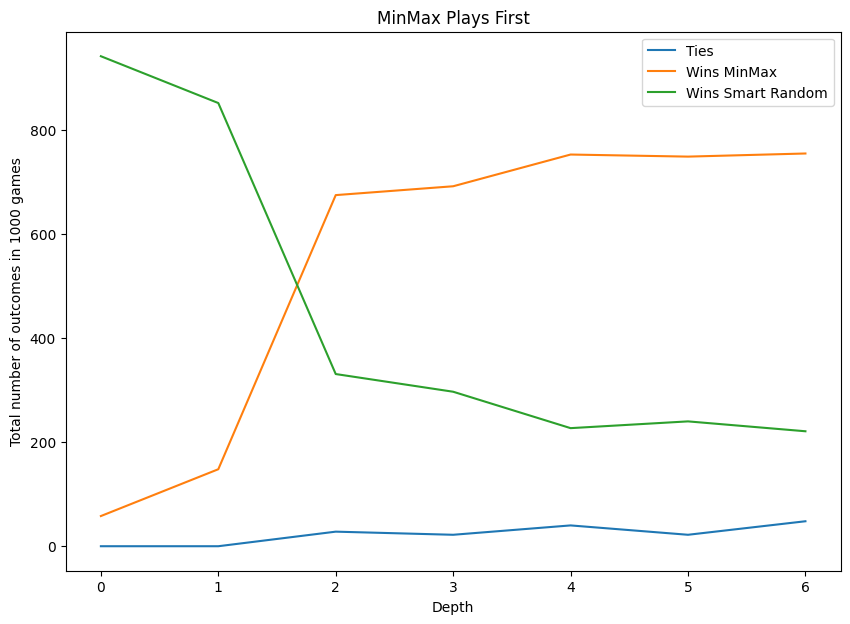

In [644]:
plt.figure(figsize=(10, 7),dpi=100)

iters = [6,5,4,3,2,1,0]
all_depth_data_wins_minmax_c = [755, 749, 753, 692, 675, 148, 58]
all_depth_data_wins_smart_c = [221, 240, 227, 297, 331, 852, 942]
all_depth_data_ties_c = [48, 22, 40, 22, 28, 0, 0]

plt.plot(iters,all_depth_data_ties_c,label = 'Ties')
plt.plot(iters,all_depth_data_wins_minmax_c,label = 'Wins MinMax')
plt.plot(iters,all_depth_data_wins_smart_c,label = 'Wins Smart Random')


plt.title("MinMax Plays First")
plt.xlabel('Depth')
plt.ylabel('Total number of outcomes in 1000 games') 
plt.legend()
plt.show()


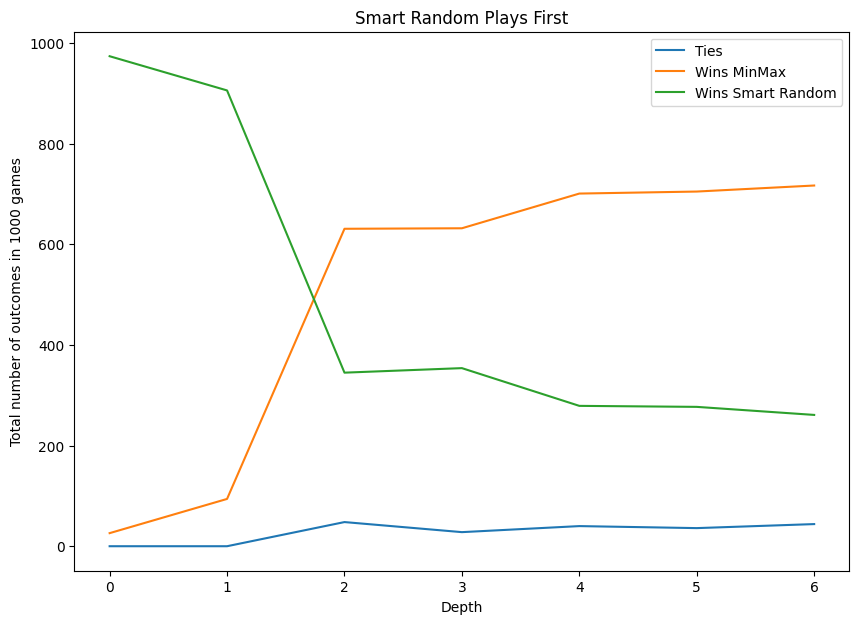

In [645]:
plt.figure(figsize=(10, 7),dpi=100)

iters = [6,5,4,3,2,1,0]
all_depth_data_wins_minmax_s = [717, 705, 701, 632, 631, 94, 26]
all_depth_data_wins_smart_s = [261, 277, 279, 354, 345, 906, 974]
all_depth_data_ties_s = [44, 36, 40, 28, 48, 0, 0]

plt.plot(iters,all_depth_data_ties_s,label = 'Ties')
plt.plot(iters,all_depth_data_wins_minmax_s,label = 'Wins MinMax')
plt.plot(iters,all_depth_data_wins_smart_s,label = 'Wins Smart Random')


plt.title("Smart Random Plays First")
plt.xlabel('Depth')
plt.ylabel('Total number of outcomes in 1000 games') 
plt.legend()
plt.show()


In [540]:
game = Connect4()
board = [
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
]
i = 0
isPrun = True
        
while not game.check_winner(board):
    if i%2==0:
        print('Computer')
#         move = int(input('\nEnter your move: '))
        a,b = game.get_best_move(board,depth,isPrun)
#         move = 
        row = getValidRow(board,move)
        board[a][b] = 'x'
    else:
        print('Random')
#         a,b = game.get_best_move(board,depth,isPrun)
#           print(check_potential_win(board,'x'))
        move = check_potential_win(board,'x')
        
        row = getValidRow(board,move)
        print(row)
#         board[a][b] = 'o'
        board[row][move] = 'o'
        

    game.printboard(board)
    i = i + 1
print(game.check_winner(board))

Computer
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
| x |   |   |   |   |   | 

Random
6
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
| x |   |   | o |   |   | 

Computer
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
| x |   |   |   |   |   | 
| x |   |   | o |   |   | 

Random
6
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
| x |   |   |   |   |   | 
| x |   | o | o |   |   | 

Computer
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
|   |   |   |   |   |   | 
| x |   |   |   |   |   | 
| x |   | o | o | x |   | 

Rando

KeyboardInterrupt: 

In [ ]:
board = [
    [ '_', '_', '_' ,'_', '_', '_'],
    
    [ '_', '_', '_' ,'_', '_', '_'],
    
    [ '_', '_', '_' ,'_', '_', '_'],
    
    [ '_', '_', '_' ,'_', '_', '_'],
    
    [ '_', '_', '_' ,'_', '_', '_'],
    
    [ '_', '_', '_' ,'_', '_', '_'],
    
    [ '_', '_', '_' ,'_', '_', '_'],
]

In [591]:
def check_potential_win(board, player):
    
    for row in board:
        for j in range(4):
#             print(row,j,j+1,j+2,j+3)
            if j==3:
                break
            if row[j] == player and row[j+1] == player and row[j+2] == player and row[j+3] == '_':
                return j+3
            if row[j] == player and row[j+1] == player and row[j+3] == player and row[j+2] == '_':
                return j+2
            if row[j] == player and row[j+2] == player and row[j+3] == player and row[j+1] == '_':
                return j+1
            if row[j+1] == player and row[j+2] == player and row[j+3] == player and row[j] == '_':
                return j
    
    for j in range(6):
        for i in range(4):
            if board[i][j] == '_' and board[i+1][j] == player and board[i+2][j] == player and board[i+3][j] == player:
                return j
        
    for i in range(4):
        for j in range(3):
#             print(i,j)
            
            if i>=3 and j>=1:
                break
            if board[i][j] == '_' and board[i+1][j+1] == player and board[i+2][j+2] == player and board[i+3][j+3] == player:
                return j            
            
            
    for i in range(4):
        for j in range(3, 6):
            if board[i][j] == '_' and board[i+1][j-1] == player and board[i+2][j-2] == player and board[i+3][j-3] == player:
                return j

    k = []
    for i in range(6):
        if board[0][i] == '_':
            k.append(i)
#     print(k)

    if len(k):
        return k[random.randint(0,len(k)-1)]
    else:
        return -1





In [592]:
print(check_potential_win(board,'o'))

5


In [562]:
board

[['x', '_', '_', '_', '_', '_'],
 ['x', '_', '_', '_', '_', '_'],
 ['x', 'o', 'o', 'o', 'x', '_'],
 ['o', 'x', 'o', 'x', 'x', '_'],
 ['x', 'x', 'x', 'o', 'o', '_'],
 ['x', 'o', 'o', 'o', 'x', '_'],
 ['x', 'o', 'o', 'o', 'x', 'o']]

In [257]:
def drop_piece(board, column):
    row = 6
    while row >= 0:
        if board[row][column] == '_':
            break
        row -= 1
    if row < 0:
        return -1
    return row

In [291]:
r = drop_piece(board,5)

In [292]:
print(r)

0


In [293]:
board[r][5] = 'x'

In [294]:
game.printboard(board)

| x |   |   |   |   | x | 
| o |   |   |   |   | x | 
| x |   |   |   |   | x | 
| x |   |   |   |   | x | 
| x | x | x |   |   | x | 
| o | o | o | x |   | x | 
| x | o | o | o | x | x | 



In [123]:
# Define the board
board = [
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
    [ '_', '_', '_' ,'_', '_', '_'],
]


board = (0,0,0,0,0,0,0,0,0)

# Define the function to check available moves
def available_moves(state):
    moves = []
    for i in range(len(board)):
        r = i%3
        c = i//3
        if 

In [127]:
moves = available_moves(board)

TypeError: object of type 'int' has no len()

In [220]:
board = (0,0,0,0,0,0,
         0,0,0,0,0,0,
         0,0,0,0,0,0,
         0,0,0,0,0,0,
         0,0,0,0,0,0,
         0,0,0,0,0,0,
         0,0,0,0,0,0)

In [221]:
def available_moves(board):
    moves = []
    rows = 7
    cols = 6
    for i in range(cols):
        for j in range(rows-1,-1,-1):
            if board[(j*cols) + i] == 0:
                moves.append((j*cols) + i)
                break
    return moves

In [222]:
moves = available_moves(board)

In [223]:
moves

[30, 25, 20, 3, 40, 41]

In [1]:
def endgame(state):
    rows = 7
    cols = 6
    check = [1, 2]
    for p in check:

        for r in range(rows):
            for c in range(cols - 3):
                if state[r*cols+c] == p and state[r*cols+c+1] == p and state[r*cols+c+2] == p and state[r*cols+c+3] == p:
                    return p
                
        for r in range(rows - 3):
            for c in range(cols):
                if state[r*cols+c] == p and state[(r+1)*cols+c] == p and state[(r+2)*cols+c] == p and state[(r+3)*cols+c] == p:
                    return p
        
        for r in range(rows - 3):
            for c in range(cols - 3):
                if state[r*cols+c] == p and state[(r+1)*cols+c+1] == p and state[(r+2)*cols+c+2] == p and state[(r+3)*cols+c+3] == p:
                    return p
                

        for r in range(3, rows):
            for c in range(cols - 3):
                if state[r*cols+c] == p and state[(r-1)*cols+c+1] == p and state[(r-2)*cols+c+2] == p and state[(r-3)*cols+c+3] == p:
                    return p
                
                
    if all(x != 0 for x in state):
        return -1
    return 0


In [225]:
endgame(board)

0

In [17]:
import random

# Define the board
board = [
    ['_', '_', '_', '_', '_', '_'],
    ['_', '_', '_', '_', '_', '_'],
    ['_', '_', '_', '_', '_', '_'],
    ['_', '_', '_', '_', '_', '_'],
    ['_', '_', '_', '_', '_', '_'],
    ['_', '_', '_', '_', '_', '_'],
    ['_', '_', '_', '_', '_', '_'],
]

# Define a function to print the board
def print_board(board):
    for row in board:
        print(' '.join(row))
    print('')

# Define a function to check if a player has won
def check_win(board, player):
    # Check horizontal
    for row in board:
        for i in range(len(row)-3):
            if row[i:i+4] == [player]*4:
                return True
    # Check vertical
    for i in range(len(board)-3):
        for j in range(len(board[0])):
            if [board[i+k][j] for k in range(4)] == [player]*4:
                return True
    # Check diagonal (top-left to bottom-right)
    for i in range(len(board)-3):
        for j in range(len(board[0])-3):
            if [board[i+k][j+k] for k in range(4)] == [player]*4:
                return True
    # Check diagonal (bottom-left to top-right)
    for i in range(3, len(board)):
        for j in range(len(board[0])-3):
            if [board[i-k][j+k] for k in range(4)] == [player]*4:
                return True
    # No winner
    return False

# Define a function to get all valid moves
def get_valid_moves(board):
    return [i for i in range(len(board[0])) if board[0][i] == '_']

# Define a function to make a move
def make_move(board, column, player):
    for i in range(len(board)-1, -1, -1):
        if board[i][column] == '_':
            board[i][column] = player
            return True
    return False

# Define the players
players = ['X', 'O']

# Start the game
current_player = random.choice(players)
while True:
    print_board(board)
    print("It's", current_player, "'s turn")
    valid_moves = get_valid_moves(board)
    if len(valid_moves) == 0:
        print("It's a tie!")
        break
    if current_player == 'X':
        # Smart algorithm for blocking basic moves
        for move in valid_moves:
            # Check if this move blocks a horizontal win
            for i in range(len(board)):
                row = board[i]
                if row[move] == '_':
                    row[move] = 'O'
                    if check_win(board, 'O'):
                        row[move] = 'X'
                        make_move(board, move, 'X')
                        break
                    else:
                        row[move] = '_'
            else:
                continue
            break
        else:
            # No move blocks a horizontal win, choose a random move
            column = random.choice(valid_moves)
            make_move(board, column, current_player)
    else:
        # Random move for the other player
        column = random.choice(valid_moves)
        make_move(board, column, current_player)
    if check_win(board, current_player):
        print_board(board)
        print(current_player, 'wins!')
        break
    current_player = players[(players.index(current_player) +


SyntaxError: incomplete input (3944641936.py, line 98)